# DC Real Estate Data Cleaning 

### 1.1 Import the Libraries

In [1]:
#Imports
import pandas as pd
import re
import numpy as np 
import json
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### 1.2 Load the .json File

In [2]:
#Load the data into a python dictionary since its a JSON file
with open('/Users/saniaspry/Documents/Flatiron/Phase-4/project/AI-Chatbot-for-Real-Estate/data/washington dc_real estate market_houses for sale_2024_light.json', 'r') as file:
    data = json.load(file)

In [3]:
#Convert JSON to a pandas dataframe
dc_df = pd.DataFrame(data)

We use json to load the data into Python and convert it into a DataFrame for easier analysis. The head() function shows the first few rows.

In [4]:
#Display first few rows to understand the data structure 
dc_df.head()

,zpid,id,rawHomeStatusCd,marketingStatusSimplifiedCd,imgSrc,hasImage,detailUrl,statusType,statusText,countryCurrency,...,openHouseDescription,builderName,providerListingId,variableData,streetViewURL,streetViewMetadataURL,isPropertyResultCDP,availabilityDate,lotAreaString,info2String
0,12103562,12103562,ComingSoon,Coming Soon,https://photos.zillowstatic.com/fp/c98ecde06e1...,True,https://www.zillow.com/homedetails/2600-13th-R...,FOR_SALE,Coming soon,$,...,Open House - 5:00 - 7:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,425748,425748,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/1808abbc9d7...,True,https://www.zillow.com/homedetails/1541-N-Caro...,FOR_SALE,Townhouse for sale,$,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,435451,435451,ForSale,New Construction,https://photos.zillowstatic.com/fp/3f44fd0a6ea...,True,https://www.zillow.com/homedetails/2400-Foxhal...,FOR_SALE,New construction,$,...,NaN,Banks Development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,458388,458388,ComingSoon,Coming Soon,https://photos.zillowstatic.com/fp/f8fc2b08d0f...,True,https://www.zillow.com/homedetails/5348-29th-S...,FOR_SALE,Coming soon,$,...,Open House - 4:00 - 6:00 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,344613704,344613704,ForSale,For Sale by Agent,https://photos.zillowstatic.com/fp/a2646ea36b9...,True,https://www.zillow.com/homedetails/36-Channing...,FOR_SALE,Townhouse for sale,$,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Initial Insights

- Property Status: Properties are listed as "Coming Soon," "For Sale by Agent," or "New Construction," indicating different stages of availability.
- Image Availability: All entries so far have images (hasImage=True), which is crucial for user engagement in the chatbot.
- Open House: Only certain listings include open house descriptions, which may limit the chatbot's ability to suggest immediate viewing opportunities.
- Incomplete Data: Columns like builderName, variableData, and availabilityDate contain significant missing values, affecting their usability.
- URL Links: Columns such as detailUrl and imgSrc provide links for users to explore listings further, making them integral for the chatbot's response system.


## Data Inspection

### 2.1 Understand the Structure

In [5]:
#Check the number of rows and columns
print(f"Dataset contains {dc_df.shape[0]} rows and {dc_df.shape[1]} columns.")

Dataset contains 5181 rows and 57 columns.


In [6]:
#Check the column names 
print("Column names:", dc_df.columns.tolist())

Column names: ['zpid', 'id', 'rawHomeStatusCd', 'marketingStatusSimplifiedCd', 'imgSrc', 'hasImage', 'detailUrl', 'statusType', 'statusText', 'countryCurrency', 'price', 'unformattedPrice', 'address', 'addressStreet', 'addressCity', 'addressState', 'addressZipcode', 'isUndisclosedAddress', 'beds', 'baths', 'area', 'latLong', 'isZillowOwned', 'flexFieldText', 'flexFieldType', 'hdpData', 'isSaved', 'isUserClaimingOwner', 'isUserConfirmedClaim', 'pgapt', 'sgapt', 'zestimate', 'shouldShowZestimateAsPrice', 'has3DModel', 'hasVideo', 'isHomeRec', 'hasAdditionalAttributions', 'isFeaturedListing', 'isShowcaseListing', 'list', 'relaxed', 'info3String', 'brokerName', 'carouselPhotos', 'hasOpenHouse', 'openHouseStartDate', 'openHouseEndDate', 'openHouseDescription', 'builderName', 'providerListingId', 'variableData', 'streetViewURL', 'streetViewMetadataURL', 'isPropertyResultCDP', 'availabilityDate', 'lotAreaString', 'info2String']


The dataset contains 5,181 rows and 57 columns representing detailed information about real estate listings, such as property type, location, price, and availability. This dataset is well-suited for developing an AI chatbot because it includes both structured information (e.g., price, address, beds, baths) and unstructured details (e.g., openHouseDescription, variableData) that can be utilized for engaging with users and recommending real estate options.

#### Column Cleaning Considerations

- Standardize Column Names: Convert to lowercase and replace spaces with underscores for consistency, e.g., openHouseDescription → open_house_description.
- Drop Unnecessary Columns: Remove columns like providerListingId, streetViewURL, and streetViewMetadataURL due to high missingness or redundancy.
- Impute Missing Values:
  - Categorical columns: Use the mode or "Unknown" for builderName, info3String.
  - Numerical columns: Use the median for area, price, or similar.
- Handle Missing Images: If hasImage is False, consider flagging these rows for limited usability.
- Encode Columns for ML: Convert categorical data like statusType and marketingStatusSimplifiedCd into numeric codes.

### Structure of the Dataset for Chatbot Use
**Necessary columns for the chatbot:**
 - Engagement: address, price, beds, baths, area, statusType
 - Follow-up: zpid, id, detailUrl, availabilityDate
 - Recommendations: lotAreaString, marketingStatusSimplifiedCd, builderName

**Necessary columns for exploratory data analysis (EDA):**
 - price, beds, baths, area, statusType, isUndisclosedAddress, builderName
 
**Necessary columns for inferential statistics and ML:**
 - price, beds, baths, area, latLong, isZillowOwned

We are going to drop the unnecessary columns before cleaning the data. This step reduces the dataset to only relevant information, making the cleaning process more efficient and focused.

Create a list of necessary columns based on their usage for the chatbot, EDA, inferential statistics, and ML:

In [7]:
necessary_columns = [
    'address', 'price', 'beds', 'baths', 'area', 'statusType', 
    'zpid', 'id', 'detailUrl', 'availabilityDate', 'lotAreaString', 
    'marketingStatusSimplifiedCd', 'builderName', 'latLong', 
    'isUndisclosedAddress', 'isZillowOwned'
]


In [8]:
#Drop all other columns:
reduced_df = dc_df[necessary_columns].copy()


In [9]:
#Display the data types of each column
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5181 entries, 0 to 5180
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      5181 non-null   object 
 1   price                        5181 non-null   object 
 2   beds                         5072 non-null   float64
 3   baths                        4978 non-null   float64
 4   area                         5084 non-null   float64
 5   statusType                   5181 non-null   object 
 6   zpid                         5181 non-null   object 
 7   id                           5181 non-null   object 
 8   detailUrl                    5181 non-null   object 
 9   availabilityDate             2 non-null      object 
 10  lotAreaString                97 non-null     object 
 11  marketingStatusSimplifiedCd  5181 non-null   object 
 12  builderName                  795 non-null    object 
 13  latLong           

This step helps us see what kind of data we’re dealing with (e.g., numbers, text, dates) and identifies potential issues like missing or incorrectly formatted data.

### 2.2 Check for Missing Values
Missing data is common in real-world datasets. This helps us identify where the gaps are.

In [10]:
#Count missing values in each column
missing_values = reduced_df.isnull().sum()

In [11]:
#Display only columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
beds                 109
baths                203
area                  97
availabilityDate    5179
lotAreaString       5084
builderName         4386
dtype: int64


beds (109 missing): Number of bedrooms.
- Essential for chatbot recommendations and EDA.
- Missing values might indicate incomplete listings.

baths (203 missing): Number of bathrooms.
- Like beds, critical for recommendations and analysis.

area (97 missing): Square footage of the property.
- Important for pricing analysis and model-building.

availabilityDate (5179 missing): When the property will be available.
- Almost completely missing, likely irrelevant for analysis.

lotAreaString (5084 missing): Lot size in a string format (e.g., "0.25 acres").
- Has high missing values but could provide insights if cleaned and imputed.

builderName (4386 missing): Name of the property builder.
- Useful for chatbot recommendations but missing heavily.

### 2.3 Check for Duplicates
Duplicates can distort analysis. Removing them ensures data accuracy.



In [12]:
#Convert unhashable columns to strings before checking for duplicates:
reduced_df = reduced_df.applymap(lambda x: str(x) if isinstance(x, dict) else x)

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/3224315574.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  reduced_df = reduced_df.applymap(lambda x: str(x) if isinstance(x, dict) else x)


In [13]:
#Check for duplicate rows
duplicates = reduced_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


Duplicates can distort analysis. Removing them ensures data accuracy.

## Data Cleaning

### 3.1 Handle Missing Values

**beds, baths, and area:**

- Replace missing values with the median for now, since median is less affected by extreme values and is better suited for real estate data.
- Add a new column to indicate whether the value was missing (for machine learning).

In [14]:
#Replace missing values with the median
for col in ['beds', 'baths', 'area']:
    median_value = reduced_df[col].median()
    reduced_df[col] = reduced_df[col].fillna(median_value)
    #Create a flag column to indicate missingness
    reduced_df[f'{col}_missing'] = reduced_df[col].isnull().astype(int)


- Replacing missing values with the median ensures the dataset remains unbiased for EDA and ML.
- The flag columns (e.g., beds_missing) help ML models understand that these values were originally missing, which can improve predictions.

**availabilityDate:**

Drop this column: It’s missing for nearly all rows, making it unhelpful for analysis or chatbot functions.

In [15]:
#Drop availabilityDate
reduced_df.drop(columns=['availabilityDate'], inplace=True)


**lotAreaString:**
- Convert to a numerical format (e.g., acres or square feet) if possible.
- Replace missing values with a placeholder (e.g., 0) or impute based on similar properties.

In [19]:
# Function to extract lot area in acres
def extract_lot_area(value):
    if isinstance(value, str):
        # Extract numeric value based on the unit
        if "acre" in value.lower():
            # Extract number before 'acre' and convert to float
            return float(re.findall(r"[\d.]+", value)[0])
        elif "sqft" in value.lower():
            # Extract number before 'sqft' and convert to acres (1 acre = 43,560 sqft)
            sqft_value = float(re.findall(r"[\d.]+", value)[0])
            return sqft_value / 43560  # Convert sqft to acres
    return 0  # Default to 0 if missing or not convertible

# Apply the cleaning function
reduced_df['lotArea_acres'] = reduced_df['lotAreaString'].apply(extract_lot_area)
reduced_df.drop(columns=['lotAreaString'], inplace=True)

KeyError: 'lotAreaString'

In [20]:
reduced_df['lotArea_acres'].value_counts()

lotArea_acres
0.000000     5084
0.000046       12
0.000092        7
0.000023        6
0.000115        4
0.000138        4
0.000069        4
0.000230        3
1.040000        3
0.830000        3
0.000207        3
0.500000        2
1.000000        2
0.410000        2
0.280000        2
0.000184        2
0.270000        2
0.870000        2
0.460000        1
0.360000        1
1.490000        1
7.520000        1
1.110000        1
0.570000        1
0.720000        1
0.022567        1
1.310000        1
0.000161        1
1.140000        1
0.260000        1
0.780000        1
5.740000        1
2.640000        1
3.000000        1
2.010000        1
1.160000        1
18.030000       1
0.530000        1
0.470000        1
2.440000        1
1.200000        1
0.820000        1
0.490000        1
3.800000        1
2.600000        1
0.600000        1
0.580000        1
0.960000        1
4.370000        1
4.410000        1
0.670000        1
0.350000        1
Name: count, dtype: int64

**builderName:**

Fill with "Unknown": This column is categorical, and missing values likely represent unavailable data. Filling missing builder names with "Unknown" avoids dropping data while keeping the column usable for chatbot responses.

In [18]:
# Fill missing builder names
reduced_df['builderName'] = reduced_df['builderName'].fillna('Unknown')
reduced_df['builderName'].value_counts()


builderName
Unknown                            4386
Paramount Construction              451
BOTERO HOMES LLC                     18
Toll Brothers                        15
Eya                                  14
                                   ... 
Chase Builders                        1
Classic Homes Of Maryland, Inc.       1
Colonial Design Build                 1
Mid-atlantic                          1
The Gulick Group                      1
Name: count, Length: 148, dtype: int64

### 3.2 Format and Standardize Columns
Standardizing the data ensures consistency and usability across all steps of the project. We'll handle formatting for price, lotAreaString, latLong, and other relevant columns.



Convert price from a string format (e.g., "$250,000") to a numeric format (250000.0).
- Remove any special characters like +.
- Verify there are no entries with non-convertible values left.

In [21]:
#Handle non-standard price formats
def clean_price(price):
    #Remove "$", "," and "+"; Convert to float if possible
    try:
        return float(price.replace('$', '').replace(',', '').replace('+', '').strip())
    except ValueError:
        return None  # Set non-convertible values to None

#Apply cleaning function to 'price' column
reduced_df['price'] = reduced_df['price'].apply(clean_price)

#Optional: Drop rows with missing 'price' (if critical for analysis)
#reduced_df = reduced_df.dropna(subset=['price'])

Split the latitude and longitude values into separate columns for spatial analysis and mapping. Remove the original latLong column for clarity. Parse latLong strings properly.
Ensure each entry conforms to the expected structure.

In [22]:
import ast  #For safely parsing dictionary-like strings

#Extract latitude safely
def extract_latitude(latLong):
    if latLong is None:
        return None  #Return None if the input is None
    try:
        latlong_dict = ast.literal_eval(latLong)  #Parse string to dictionary
        latitude = latlong_dict.get('latitude', None)
        return float(latitude) if latitude is not None else None
    except (ValueError, SyntaxError, AttributeError):
        return None  #Return None if parsing or extraction fails

#Extract longitude safely
def extract_longitude(latLong):
    if latLong is None:
        return None  #Return None if the input is None
    try:
        latlong_dict = ast.literal_eval(latLong)  # Parse string to dictionary
        longitude = latlong_dict.get('longitude', None)
        return float(longitude) if longitude is not None else None
    except (ValueError, SyntaxError, AttributeError):
        return None  #Return None if parsing or extraction fails

#Apply the functions to the latLong column
reduced_df['latitude'] = reduced_df['latLong'].apply(extract_latitude)
reduced_df['longitude'] = reduced_df['latLong'].apply(extract_longitude)

#Drop the 'latLong' column
reduced_df.drop(columns=['latLong'], inplace=True)

#Drop rows where 'latitude' or 'longitude' is None (if necessary)
reduced_df = reduced_df.dropna(subset=['latitude', 'longitude'])


### 3.3 Fix Categorical Data

In [23]:
# Check unique values for each categorical column
print("Unique values in 'statusType':", reduced_df['statusType'].unique())
print("Unique values in 'marketingStatusSimplifiedCd':", reduced_df['marketingStatusSimplifiedCd'].unique())
print("Unique values in 'builderName':", reduced_df['builderName'].unique())


Unique values in 'statusType': ['FOR_SALE']
Unique values in 'marketingStatusSimplifiedCd': ['Coming Soon' 'For Sale by Agent' 'New Construction' 'RecentChange'
 'New Construction Spec Condo' 'New Construction Plan'
 'New Construction Spec' 'New Construction Plan Condo'
 'Pre-Foreclosure - RecentChange']
Unique values in 'builderName': ['Unknown' 'Banks Development' 'Ril Estates Llc' 'Pt Blooms'
 'McWilliams Ballard' 'Knutson Companies' 'Nvhomes' 'Kite House'
 'Zuckerman Builders' 'Ssr Development' 'Pizzano' 'Hdbuilds'
 'Jlp Contractors' 'Eckington Nw Residential Fs, Llc' 'Harbor Builders'
 'Classic Cottages' 'Kb Custom Homes' 'Morris Construction'
 '5507 7th St Nw Llc' 'Eya' 'Fortis' 'Schmidt Development'
 'Pizzano Contractors' 'Urban Pace' 'Harbor Building' 'Clemens Builders'
 'Ryan Homes' 'Erb Properties Llc' 'Stanley Martin Homes'
 'Werrlein Wssc Llc' 'M-r Custom Homes' 'Paramount Construction'
 'Stanley Martin Companies_Washington DC Metro' 'Beaconcrest Homes'
 'Werrlein Propertie

**Handling Unique Values in Categorical Columns**

Builder names are expected to vary widely because:
 - They represent individual companies or entities, often specific to a region or project.
 - The categorical nature of this column means it's less critical for predictive modeling unless the builder is a significant factor in our analysis.

Action Plan:
- Retain the column but encode it for machine learning models using Label Encoding, One-Hot Encoding, or other techniques.
- Check for patterns: For example, do certain builders consistently produce higher-value properties?


Unique Values in statusType and marketingStatusSimplifiedCd
- statusType: Since all values are "FOR_SALE", it doesn't add variability to the dataset. We can drop this column because it doesn't provide additional insights.

- marketingStatusSimplifiedCd:
  - This column has more variety and might provide useful information about the property.
  - Standardize text (lowercase, replace spaces with underscores) and possibly encode it if used in modeling.


In [24]:
#Step 1: Standardize 'statusType' (Drop if redundant)
if reduced_df['statusType'].nunique() == 1:
    reduced_df.drop(columns=['statusType'], inplace=True)

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/2316980878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df.drop(columns=['statusType'], inplace=True)


In [25]:
#Step 2: Clean and standardize 'marketingStatusSimplifiedCd'
#Convert to lowercase and replace spaces with underscores
reduced_df['marketingStatusSimplifiedCd'] = (
    reduced_df['marketingStatusSimplifiedCd'].str.lower().str.replace(' ', '_')
)

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/3487100092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['marketingStatusSimplifiedCd'] = (


In [26]:
#Step 3: Handle 'builderName'
#Replace 'Unknown' with NaN for cleaner handling
reduced_df['builderName'] = reduced_df['builderName'].replace('Unknown', None)

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/1671898007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['builderName'] = reduced_df['builderName'].replace('Unknown', None)


In [27]:
#Label Encoding for builderName (useful for models that prefer numerical input)
builder_encoder = LabelEncoder()
reduced_df['builderName_encoded'] = builder_encoder.fit_transform(reduced_df['builderName'].astype(str))

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/3002320600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['builderName_encoded'] = builder_encoder.fit_transform(reduced_df['builderName'].astype(str))


In [28]:
#Step 4: Binary encoding for 'isUndisclosedAddress' and 'isZillowOwned'
reduced_df['isUndisclosedAddress'] = reduced_df['isUndisclosedAddress'].astype(int)
reduced_df['isZillowOwned'] = reduced_df['isZillowOwned'].astype(int)

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/908061528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['isUndisclosedAddress'] = reduced_df['isUndisclosedAddress'].astype(int)
/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/908061528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['isZillowOwned'] = reduced_df['isZillowOwned'].astype(int)


In [29]:
#Display a preview of the cleaned data
reduced_df.head()

,address,price,beds,baths,area,zpid,id,detailUrl,marketingStatusSimplifiedCd,builderName,isUndisclosedAddress,isZillowOwned,beds_missing,baths_missing,area_missing,lotArea_acres,latitude,longitude,builderName_encoded
0,"2600 13th Rd S APT 392, Arlington, VA 22204",485000.0,2.0,2.0,1086.0,12103562,12103562,https://www.zillow.com/homedetails/2600-13th-R...,coming_soon,None,0,0,0,0,0,0.0,38.859770,-77.08375,91
1,"1541 N Carolina Ave NE, Washington, DC 20002",1150000.0,3.0,4.0,2540.0,425748,425748,https://www.zillow.com/homedetails/1541-N-Caro...,for_sale_by_agent,None,0,0,0,0,0,0.0,38.892773,-76.98295,91
2,"2400 Foxhall Rd NW, Washington, DC 20007",28995000.0,5.0,9.0,16250.0,435451,435451,https://www.zillow.com/homedetails/2400-Foxhal...,new_construction,Banks Development,0,0,0,0,0,0.0,38.922230,-77.09005,11
3,"5348 29th St NW, Washington, DC 20015",1195000.0,4.0,4.0,2089.0,458388,458388,https://www.zillow.com/homedetails/5348-29th-S...,coming_soon,None,0,0,0,0,0,0.0,38.960190,-77.05902,91
4,"36 Channing St NW #A, Washington, DC 20001",425900.0,3.0,2.0,4800.0,344613704,344613704,https://www.zillow.com/homedetails/36-Channing...,for_sale_by_agent,None,0,0,0,0,0,0.0,38.922190,-77.01049,91


### Explore the Data

### 4.1 Summary Statistics
Inspect numerical data distributions for insights.

In [30]:
#Summary statistics for numerical columns
reduced_df.describe()

,price,beds,baths,area,isUndisclosedAddress,isZillowOwned,beds_missing,baths_missing,area_missing,lotArea_acres,latitude,longitude,builderName_encoded
count,5.167000e+03,5175.000000,5175.000000,5175.000000,5175.0,5175.0,5175.0,5175.0,5175.0,5175.000000,5175.000000,5175.000000,5175.000000
mean,1.245691e+06,3.355942,3.136425,2071.313816,0.0,0.0,0.0,0.0,0.0,0.016403,38.914645,-77.069538,89.965411
std,1.553152e+06,2.083693,1.905868,2090.884695,0.0,0.0,0.0,0.0,0.0,0.318110,0.056743,0.104796,12.509284
min,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,38.775900,-77.501070,0.000000
25%,4.390000e+05,2.000000,2.000000,839.500000,0.0,0.0,0.0,0.0,0.0,0.000000,38.881070,-77.120432,91.000000
50%,7.490000e+05,3.000000,3.000000,1452.000000,0.0,0.0,0.0,0.0,0.0,0.000000,38.910510,-77.042550,91.000000
75%,1.590000e+06,5.000000,4.000000,2455.500000,0.0,0.0,0.0,0.0,0.0,0.000000,38.944855,-76.999700,91.000000
max,2.995000e+07,48.000000,14.000000,34807.000000,0.0,0.0,0.0,0.0,0.0,18.030000,39.093440,-76.865920,147.000000


- The average property price is approximately $1.25 million, with a standard deviation indicating a wide range of property prices.
- The average number of bedrooms and bathrooms in the listings is around 3.36 and 3.14, respectively, suggesting a predominance of family-sized homes.
- The average lot area is about 2,071 sqft, with some properties having extremely large lot areas up to 34,807 sqft.
- The majority of properties do not have a disclosed address, as indicated by the isUndisclosedAddress column being mostly 0.
- There is a notable correlation between price and lotArea_acres, which implies that larger lot sizes tend to have higher prices.

### 4.2 Visualize Missing Data
Find patterns in missing data.

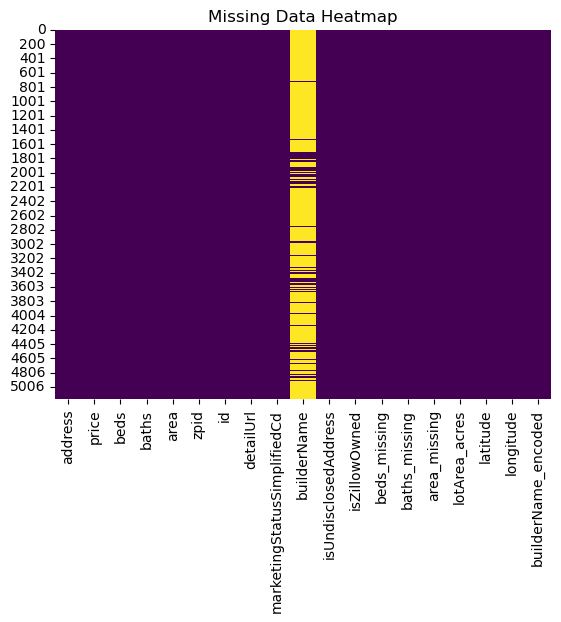

In [31]:
#Visualize missing data
sns.heatmap(reduced_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

There are a lot of missing values in the builder name.

### 4.3 Analyze Relationships
Check trends and correlations.


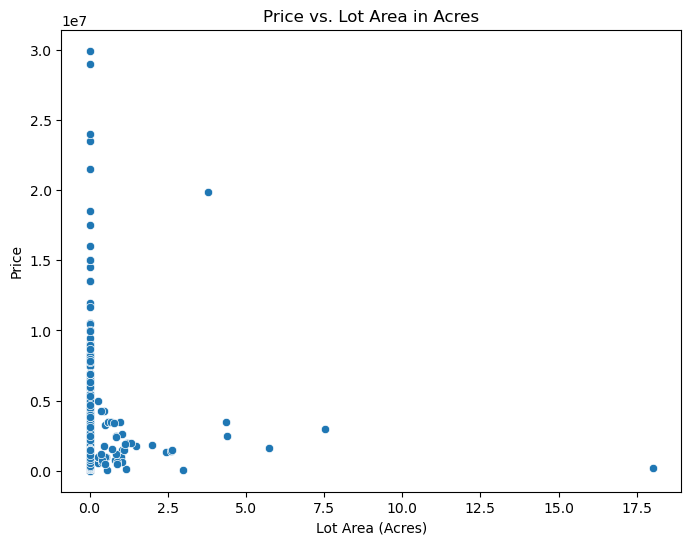

In [32]:
# Scatter plot: Price vs. Lot Area in Acres
plt.figure(figsize=(8, 6))
sns.scatterplot(x='lotArea_acres', y='price', data=reduced_df)
plt.title("Price vs. Lot Area in Acres")
plt.xlabel("Lot Area (Acres)")
plt.ylabel("Price")
plt.show()


Most properties have a lot area of fewer than 2 acres, and their prices are concentrated below $10 million.
There are a few extreme outliers with very large lot areas (greater than 10 acres) or prices exceeding $20 million.

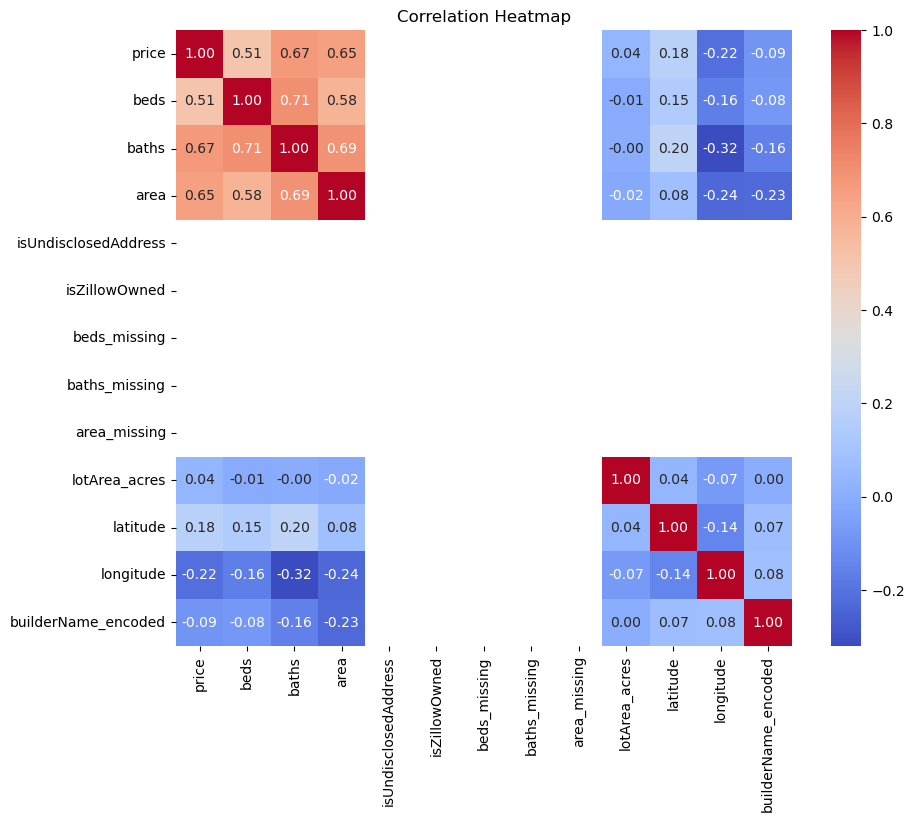

In [33]:
# Select numerical columns
numerical_df = reduced_df.select_dtypes(include=['float64', 'int64'])

# Generate a correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


- Strong positive correlations exist between price, beds (0.51), baths (0.67), and area (0.65), indicating that these features significantly influence property prices.
- Lot area (lotArea_acres) has a weak correlation with price (0.04), suggesting it might not be a strong predictor.
- Latitude and longitude show weak correlations with price, meaning geographic location in this dataset might not strongly affect property prices.

## Prepare Data for Modeling


### 5.1 Feature Engineering
Create new features for modeling.

In [36]:
reduced_df['area'].value_counts()

area
1452.0    100
0.0        88
54.0       46
43.0       37
432.0      29
         ... 
1234.0      1
1614.0      1
1658.0      1
2554.0      1
2833.0      1
Name: count, Length: 2449, dtype: int64

In [37]:
#Create a new feature: price per square foot
#Ensure there are no zero or missing values in 'lot_area_sq_ft' to avoid division errors
reduced_df['price_per_sq_ft'] = reduced_df['price'] / reduced_df['area']


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/663625127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['price_per_sq_ft'] = reduced_df['price'] / reduced_df['area']


In [38]:
#Handle infinite or NaN values (in case of missing or zero lot area)
reduced_df['price_per_sq_ft'] = reduced_df['price_per_sq_ft'].replace([float('inf'), -float('inf')], np.nan)
reduced_df['price_per_sq_ft'] = reduced_df['price_per_sq_ft'].fillna(0)


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/4286204423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['price_per_sq_ft'] = reduced_df['price_per_sq_ft'].replace([float('inf'), -float('inf')], np.nan)
/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/4286204423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['price_per_sq_ft'] = reduced_df['price_per_sq_ft'].fillna(0)


In [40]:

#Print the first few rows to verify the new feature
print(reduced_df[['price', 'lotArea_acres', 'area', 'price_per_sq_ft']].head(10))



        price  lotArea_acres     area  price_per_sq_ft
0    485000.0            0.0   1086.0       446.593002
1   1150000.0            0.0   2540.0       452.755906
2  28995000.0            0.0  16250.0      1784.307692
3   1195000.0            0.0   2089.0       572.044040
4    425900.0            0.0   4800.0        88.729167
5    325000.0            0.0    727.0       447.042641
6    260000.0            0.0    950.0       273.684211
7    600000.0            0.0   2183.0       274.851122
8    445000.0            0.0    930.0       478.494624
9    999900.0            0.0   2276.0       439.323374


In [41]:
# Categorize price ranges
reduced_df['price_range'] = pd.cut(
    reduced_df['price'], 
    bins=[0, 500000, 1000000, 5000000], 
    labels=['Low', 'Medium', 'High']
)


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/168494492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['price_range'] = pd.cut(


### 5.2 Handle Outliers


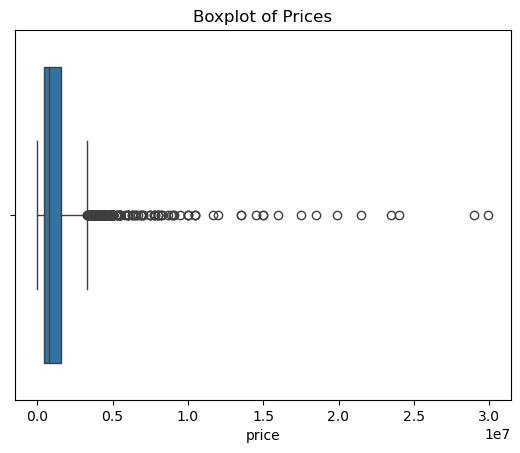

In [42]:
# Visualize outliers using a boxplot
sns.boxplot(x=reduced_df['price'])
plt.title("Boxplot of Prices")
plt.show()


In [43]:

#Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = reduced_df['price'].quantile(0.25)
Q3 = reduced_df['price'].quantile(0.75)

#Calculate IQR
IQR = Q3 - Q1

#Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter the dataset to remove outliers
reduced_df = reduced_df[(reduced_df['price'] >= lower_bound) & (reduced_df['price'] <= upper_bound)]

#Print bounds for verification
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")



Lower Bound: -1287500.0, Upper Bound: 3316500.0


### 5.3 Normalize Numerical Data
Normalize for improved model performance.

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical columns
scaler = MinMaxScaler()
reduced_df[['price', 'area']] = scaler.fit_transform(reduced_df[['price', 'area']])


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_15302/4210997632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df[['price', 'area']] = scaler.fit_transform(reduced_df[['price', 'area']])


## Export Clean Data

In [45]:
#Save the cleaned dataset to a file
reduced_df.to_csv('cleaned_real_estate_data.csv', index=False)
